In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm
from pathlib import Path

N_experiments = 100
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


### Zero Shot transfer Performance

Policies are trained for 300,000 iterations on $\phi_0$, $\phi_1$, and $\phi_2$.

- Evaluate on $\phi_0$, $\phi_1$, and $\phi_2$ (trajectory plots with MSE)
- Evaluate on $\phi_t = w_0 + \phi_0 + w_1 + \phi_1 + w_2 + \phi_2$ (sample trajectory plots with MSE)
- Evaluate zero-shot vs few-shot on $\phi_4$ (plot of training iterations vs reward) & (trajectory following zero-shot vs finetuned downstream trajectory following)  

##### Evaluation on Training Tasks 

In [3]:
ckpt = 300000
basis_CTRLSAC_multi = torch.load(f"/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval-basis/CTRLSAC-multi/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/agent_{ckpt}.pth")
basis_CTRLSAC = torch.load(f"/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval-basis/CTRLSAC/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/agent_{ckpt}.pth")
basis_SAC = torch.load(f"/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval-basis/SAC/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/agent_{ckpt}.pth")

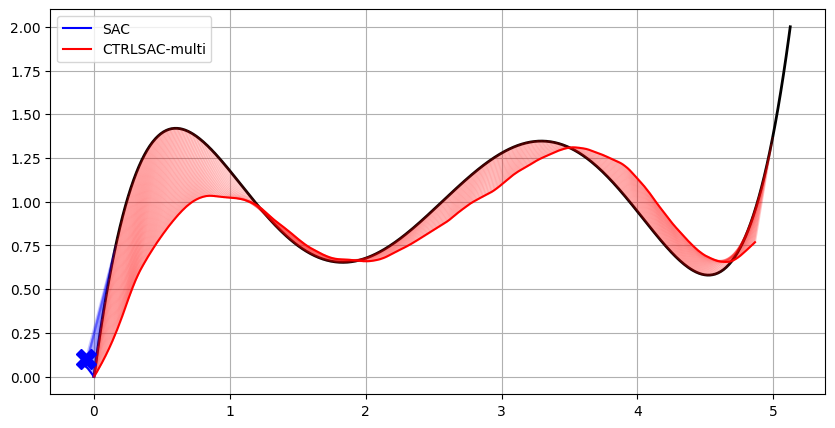

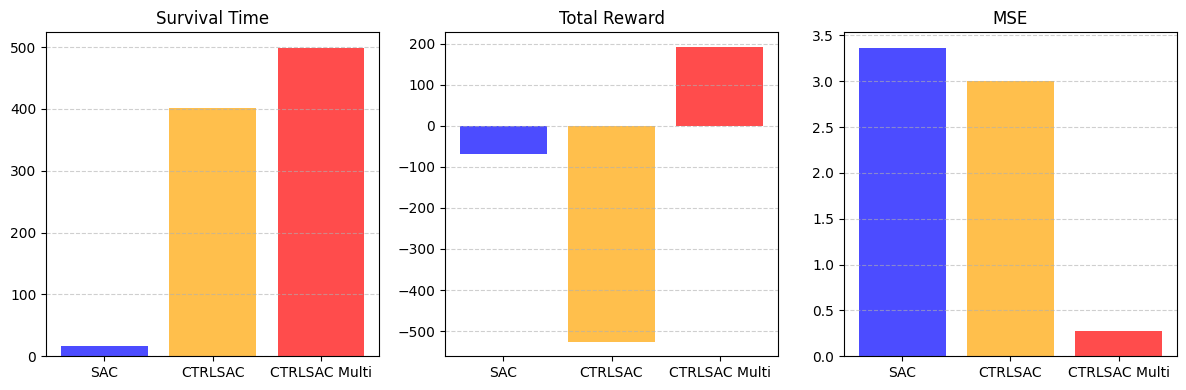

In [11]:
phi = 5
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
gt = basis_SAC[phi]['trajectory'].cpu().numpy()

SAC = basis_SAC[phi]['pose'].cpu().numpy()
SAC_time_alive = basis_SAC[phi]['time_alive'] 

CTRLSAC_multi = basis_CTRLSAC_multi[phi]['pose'].cpu().numpy()
CTRLSAC_multi_time_alive = basis_CTRLSAC_multi[phi]['time_alive']

CTRLSAC = basis_CTRLSAC[phi]['pose'].cpu().numpy()
CTRLSAC_time_alive = basis_CTRLSAC[phi]['time_alive']

axes.plot(gt[:, 0], gt[:, 1], color='black', linewidth=2)
axes.grid(True)
axes.plot(SAC[:SAC_time_alive, 0], SAC[:SAC_time_alive, 1], color='blue', linewidth=1.5, label= 'SAC')

axes.plot(CTRLSAC_multi[:CTRLSAC_multi_time_alive, 0], CTRLSAC_multi[:CTRLSAC_multi_time_alive, 1], color='red', linewidth=1.5, label='CTRLSAC-multi')

for t in range(SAC_time_alive):
    axes.plot([SAC[t, 0], gt[t, 0]], [SAC[t, 1], gt[t, 1]], color='blue', alpha=0.2)
    
for t in range(CTRLSAC_multi_time_alive):
    axes.plot([gt[t, 0], CTRLSAC_multi[t, 0]], [gt[t, 1], CTRLSAC_multi[t, 1]], color='red', alpha=0.2)


if SAC_time_alive < 499:
    axes.plot(SAC[SAC_time_alive - 1, 0], SAC[SAC_time_alive - 1, 1], marker='X', color='blue', linewidth=2, markersize=15)

if CTRLSAC_multi_time_alive < 499:
    axes.plot(CTRLSAC_multi[CTRLSAC_multi_time_alive, 0], CTRLSAC_multi[CTRLSAC_multi_time_alive, 1], marker='X', color='red', markersize=15)


axes.legend()
plt.savefig(f'/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/results/phi_{phi}_traj.png')
plt.show()

## Survival Time, Total Reward, MSE
SAC_MSE = np.square(gt - SAC).mean()
SAC_TOTAL_REWARD = basis_SAC[phi]['total_reward'].item()
SAC_SURVIVAL_TIME = SAC_time_alive

CTRLSAC_multi_MSE = np.square(gt - CTRLSAC_multi).mean()
CTRLSAC_multi_TOTAL_REWARD = basis_CTRLSAC_multi[phi]['total_reward'].item()
CTRLSAC_multi_SURVIVAL_TIME = CTRLSAC_multi_time_alive

CTRLSAC_MSE = np.square(gt - CTRLSAC).mean()
CTRLSAC_TOTAL_REWARD = basis_CTRLSAC[phi]['total_reward'].item()
CTRLSAC_SURVIVAL_TIME= CTRLSAC_time_alive

import numpy as np
import matplotlib.pyplot as plt

# Data for the plots
categories = ['Survival Time', 'Total Reward', 'MSE']
SAC_values = [SAC_SURVIVAL_TIME, SAC_TOTAL_REWARD, SAC_MSE]
CTRLSAC_values = [CTRLSAC_SURVIVAL_TIME, CTRLSAC_TOTAL_REWARD, CTRLSAC_MSE]
CTRLSAC_multi_values = [CTRLSAC_multi_SURVIVAL_TIME, CTRLSAC_multi_TOTAL_REWARD, CTRLSAC_multi_MSE]

# Create subplots with shared x-axis
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  

# Define colors
colors = ['blue', 'orange', 'red']
labels = ['SAC', 'CTRLSAC', 'CTRLSAC Multi']

# Plot each metric in its own subplot
for i, (ax, category) in enumerate(zip(axes, categories)):
    values = [SAC_values[i], CTRLSAC_values[i], CTRLSAC_multi_values[i]]
    
    # Bar plot for each metric
    ax.bar(labels, values, color=colors, alpha=0.7)
    
    # Formatting
    ax.set_title(category, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(f'/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/results/phi_{phi}_metrics.png')
plt.show()


In [13]:
ckpt = 300000
random_CTRLSAC_multi = torch.load(f"/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval-random/CTRLSAC-multi/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/agent_{ckpt}.pth")
random_CTRLSAC = torch.load(f"/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval-random/CTRLSAC/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/agent_{ckpt}.pth")
random_SAC = torch.load(f"/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval-random/SAC/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/agent_{ckpt}.pth")

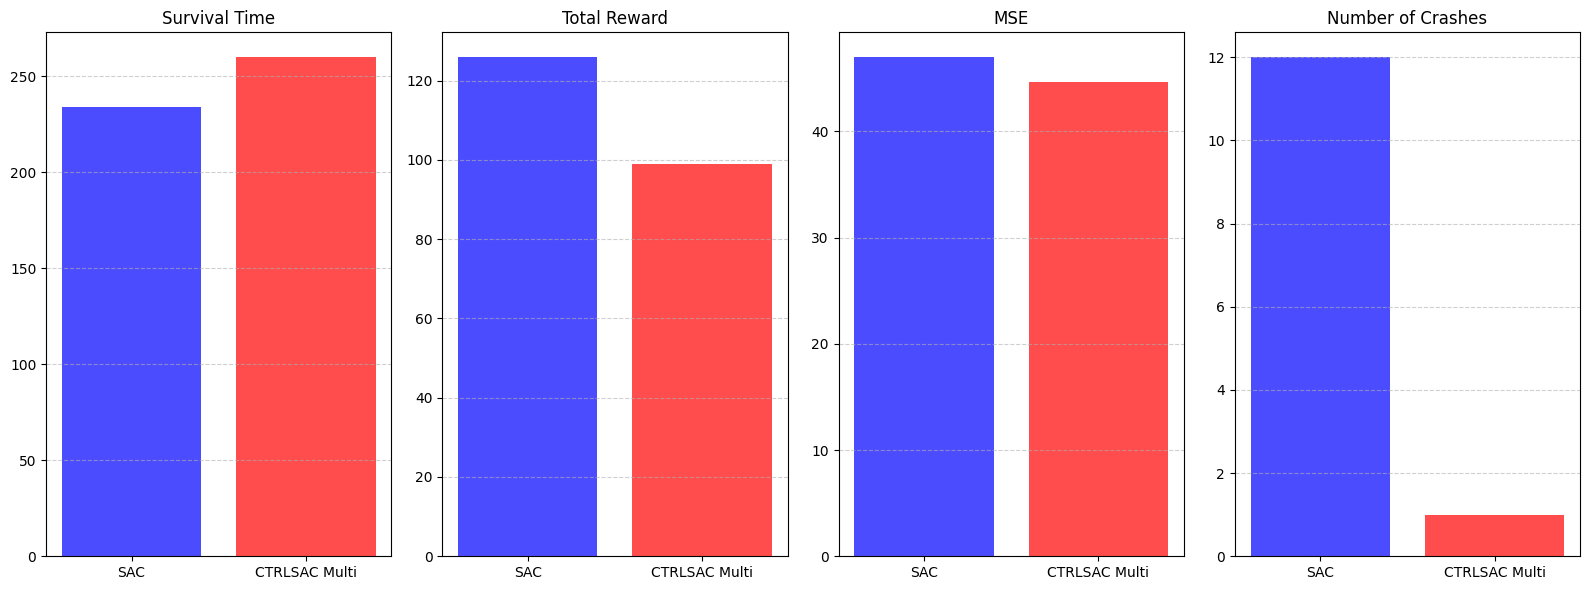

In [14]:
SAC_MSE = 0
SAC_TOTAL_REWARD = 0
SAC_SURVIVAL_TIME = 0
SAC_CRASHES = 0

CTRLSAC_multi_MSE = 0
CTRLSAC_multi_TOTAL_REWARD = 0
CTRLSAC_multi_SURVIVAL_TIME = 0
CTRLSAC_multi_CRASHES = 0

num_trials = 100
for trial in range(num_trials):
    gt = random_SAC[trial]['trajectory'].cpu().numpy()
    SAC = random_SAC[trial]['pose'].cpu().numpy()
    SAC_MSE += np.square(gt - SAC).mean()
    SAC_TOTAL_REWARD += random_SAC[trial]['total_reward'].item()
    SAC_SURVIVAL_TIME += random_SAC[trial]['time_alive']
    SAC_CRASHES += random_SAC[trial]['crashed']

    CTRLSAC_multi = random_CTRLSAC_multi[trial]['pose'].cpu().numpy()
    CTRLSAC_multi_MSE += np.square(gt - CTRLSAC_multi).mean()
    CTRLSAC_multi_TOTAL_REWARD += random_CTRLSAC_multi[trial]['total_reward'].item()
    CTRLSAC_multi_SURVIVAL_TIME += random_CTRLSAC_multi[trial]['time_alive']
    CTRLSAC_multi_CRASHES += random_CTRLSAC_multi[trial]['crashed']


# Data for the plots
categories = ['Survival Time', 'Total Reward', 'MSE', 'Number of Crashes']
SAC_values = [SAC_SURVIVAL_TIME/num_trials, SAC_TOTAL_REWARD/num_trials, SAC_MSE/num_trials, SAC_CRASHES]
CTRLSAC_multi_values = [CTRLSAC_multi_SURVIVAL_TIME/num_trials, CTRLSAC_multi_TOTAL_REWARD/num_trials, CTRLSAC_multi_MSE/num_trials, CTRLSAC_multi_CRASHES]

# Create subplots with shared x-axis
fig, axes = plt.subplots(1, 4, figsize=(16, 6))  

# Define colors
colors = ['blue', 'red']
labels = ['SAC', 'CTRLSAC Multi']

# Plot each metric in its own subplot
for i, (ax, category) in enumerate(zip(axes, categories)):
    values = [SAC_values[i], CTRLSAC_multi_values[i]]
    
    # Bar plot for each metric
    ax.bar(labels, values, color=colors, alpha=0.7)
    
    # Formatting
    ax.set_title(category, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(f'/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/results/ID_metrics.png')
plt.show()


100%|██████████| 50/50 [00:00<00:00, 1374.62it/s]


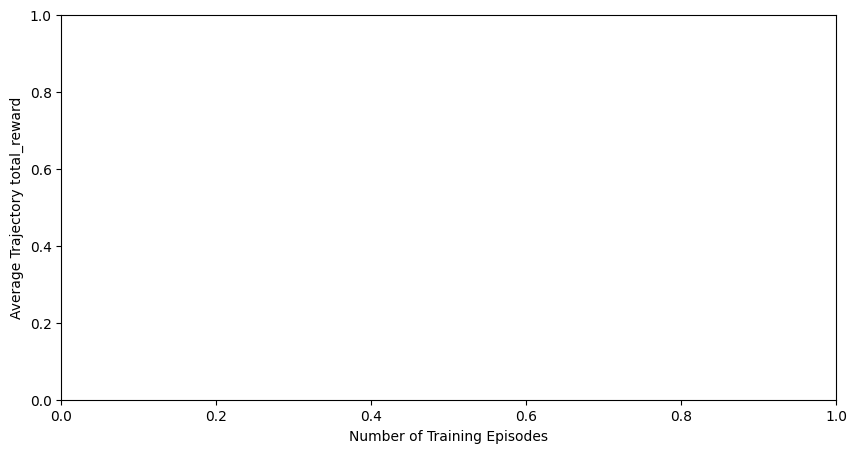

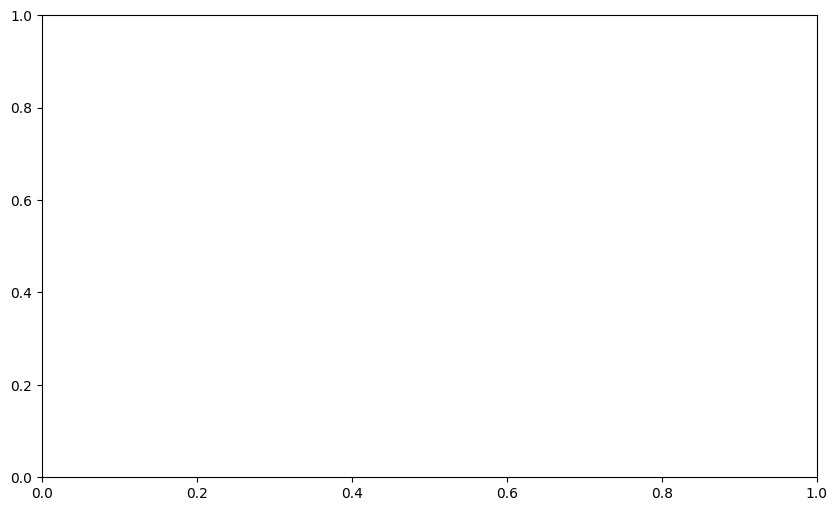

In [26]:
# 'trajectory', 'pose', 'crashed', 'time_alive', 'trajectory_legendre', 'trajectory_monomial', 'total_reward_wo_survival', 'total_reward'
N_experiments = 1
key = "total_reward"
function = 'phi5'

episode_len = 500
learning_starts = 25e3

def compute_ma_vec(vec):
    window_width = 5
    cumsum_vec = np.cumsum(np.insert(vec, 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec



def get_data(ckpt, key, normalize=False):
    results = torch.load(ckpt)
    
    metric_mean = []
    for exp in range(N_experiments):    
        scale = results[exp]['time_alive'] if normalize else 1
        metric_mean.append(results[exp][key]/scale)
    metric_mean = np.array(metric_mean).mean()    
    iterations = int(str(ckpt).split('/')[-1].split('_')[1].split('.')[0])
    return [iterations, metric_mean]


def plot_metric(ax, CTRLSAC_multi_finetune_metrics, SAC_finetune_metrics):
    CTRLSAC_multi_finetune_iterations = CTRLSAC_multi_finetune_metrics[:, 0]/episode_len
    CTRLSAC_multi_perf = (CTRLSAC_multi_finetune_metrics[:, 1])

    SAC_finetune_iterations = SAC_finetune_metrics[:, 0]/episode_len
    SAC_perf = (SAC_finetune_metrics[:, 1])

    ax.plot(CTRLSAC_multi_finetune_iterations, CTRLSAC_multi_perf, lw = 0.8, c=colors[1])
    ax.plot(CTRLSAC_multi_finetune_iterations, np.concatenate((CTRLSAC_multi_perf[:4], compute_ma_vec(CTRLSAC_multi_perf))), lw = 2, c=colors[1], label = 'CTRLSAC')

    ax.plot(SAC_finetune_iterations, SAC_perf, lw = 0.8, c=colors[0])
    ax.plot(SAC_finetune_iterations, np.concatenate((SAC_perf[:4], compute_ma_vec(SAC_perf))), lw = 2, c=colors[0], label = 'SAC')

    plt.ylabel(f'Average Trajectory {key}')
    plt.xlabel('Number of Training Episodes')
    ax.legend()
    ax.set_xlim(-2, 25)

    



fig, axes = plt.subplots(1, 1, figsize=(10, 5))

CTRLSAC_multi_finetune_folder = f'/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/{function}/CTRLSAC-multi/Isaac-Quadcopter-legtrain-finetune-Trajectory-Direct-v0'
CTRLSAC_multi_finetune_directory = Path(CTRLSAC_multi_finetune_folder)
CTRLSAC_multi_finetune_metrics = []
for ckpt in tqdm(list(CTRLSAC_multi_finetune_directory.iterdir())):
    CTRLSAC_multi_finetune_metrics.append(get_data(ckpt, key, normalize=False))
    
CTRLSAC_multi_finetune_metrics = np.array(CTRLSAC_multi_finetune_metrics)
CTRLSAC_multi_finetune_metrics = CTRLSAC_multi_finetune_metrics[CTRLSAC_multi_finetune_metrics[:, 0].argsort()]
CTRLSAC_multi_finetune_metrics[:, 0] = CTRLSAC_multi_finetune_metrics[:, 0] - learning_starts
CTRLSAC_multi_finetune_metrics = CTRLSAC_multi_finetune_metrics[CTRLSAC_multi_finetune_metrics[:, 0] >= 0] 

SAC_finetune_folder = f'/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/{function}/SAC/Isaac-Quadcopter-legtrain-finetune-Trajectory-Direct-v0'
SAC_finetune_directory = Path(SAC_finetune_folder)
SAC_finetune_metrics = []
for ckpt in tqdm(list(SAC_finetune_directory.iterdir())):
    SAC_finetune_metrics.append(get_data(ckpt, key, normalize=False))
    
SAC_finetune_metrics = np.array(SAC_finetune_metrics)
SAC_finetune_metrics = SAC_finetune_metrics[SAC_finetune_metrics[:, 0].argsort()]
SAC_finetune_metrics[:, 0] = SAC_finetune_metrics[:, 0] - learning_starts

SAC_finetune_metrics = SAC_finetune_metrics[SAC_finetune_metrics[:, 0] >= 0] 

plot_metric(axes, CTRLSAC_multi_finetune_metrics, SAC_finetune_metrics)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

PLOT_EPISODE = 10
ckpt_epoch = int(PLOT_EPISODE * episode_len + learning_starts)
finetune_CTRLSAC_multi = torch.load(f"{CTRLSAC_multi_finetune_folder}/agent_{ckpt_epoch}.pth")
finetune_SAC = torch.load(f"{SAC_finetune_folder}/agent_{ckpt_epoch}.pth")


gt = finetune_SAC[0]['trajectory'].cpu().numpy()

finetune_SAC_pose = finetune_SAC[0]['pose'].cpu().numpy()
finetune_SAC_time_alive = finetune_SAC[0]['time_alive'] 

finetune_CTRLSAC_multi_pose = finetune_CTRLSAC_multi[0]['pose'].cpu().numpy()
finetune_CTRLSAC_multi_time_alive = finetune_CTRLSAC_multi[0]['time_alive']

axes.plot(gt[:, 0], gt[:, 1], color='black', linewidth=2)
axes.grid(True)
axes.plot(finetune_SAC_pose[:finetune_SAC_time_alive, 0], finetune_SAC_pose[:finetune_SAC_time_alive, 1], color='blue', linewidth=1.5, label= 'SAC')

axes.plot(finetune_CTRLSAC_multi_pose[:finetune_CTRLSAC_multi_time_alive, 0], finetune_CTRLSAC_multi_pose[:finetune_CTRLSAC_multi_time_alive, 1], color='red', linewidth=1.5, label='CTRLSAC-multi')

for t in range(finetune_SAC_time_alive):
    axes.plot([finetune_SAC_pose[t, 0], gt[t, 0]], [finetune_SAC_pose[t, 1], gt[t, 1]], color='blue', alpha=0.2)
    
for t in range(finetune_CTRLSAC_multi_time_alive):
    axes.plot([gt[t, 0], finetune_CTRLSAC_multi_pose[t, 0]], [gt[t, 1], finetune_CTRLSAC_multi_pose[t, 1]], color='red', alpha=0.2)


if finetune_SAC_time_alive < 499:
    axes.plot(finetune_SAC_pose[finetune_SAC_time_alive - 1, 0], finetune_SAC_pose[finetune_SAC_time_alive - 1, 1], marker='X', color='blue', linewidth=2, markersize=15)

if finetune_CTRLSAC_multi_time_alive < 499:
    axes.plot(finetune_CTRLSAC_multi_pose[finetune_CTRLSAC_multi_time_alive, 0], finetune_CTRLSAC_multi_pose[finetune_CTRLSAC_multi_time_alive, 1], marker='X', color='red', markersize=15)


axes.legend()

plt.show()

